In [1]:
import pandas as pd
import numpy as np

In [2]:
bowling_stats = pd.read_csv('Player Bowling Stats - Most Wickets.csv')
team_stats = pd.read_csv('Team - Best Win Percentage.csv')
batting_stats = pd.read_csv('Player Batting Stats - Most Runs.csv')

In [3]:
print("Bowling Stats Null Values:\n", bowling_stats.isnull().sum())
print("Team Stats Null Values:\n", team_stats.isnull().sum())
print("Batting Stats Null Values:\n", batting_stats.isnull().sum())

Bowling Stats Null Values:
 Position       0
Team           0
Player         0
Matches        0
Overs          0
Strike Rate    0
Wickets        0
dtype: int64
Team Stats Null Values:
 Position    0
Team        0
Win %       0
Matches     0
Wins        0
Lost        0
dtype: int64
Batting Stats Null Values:
 Position    0
Team        0
Player      0
Matches     0
Innings     0
Bat Avg     0
Runs        0
dtype: int64


In [4]:
print("Bowling Stats Descriptive Statistics:\n", bowling_stats.describe())
print("Team Stats Descriptive Statistics:\n", team_stats.describe())
print("Batting Stats Descriptive Statistics:\n", batting_stats.describe())

Bowling Stats Descriptive Statistics:
         Position      Overs  Strike Rate    Wickets
count  15.000000  15.000000    15.000000  15.000000
mean    8.000000  26.260000    12.141333  13.266667
std     4.472136   4.623666     1.811313   2.086236
min     1.000000  16.500000     8.940000  11.000000
25%     4.500000  24.150000    11.150000  11.000000
50%     8.000000  26.400000    12.300000  13.000000
75%    11.500000  29.200000    13.360000  14.500000
max    15.000000  35.000000    15.270000  17.000000
Team Stats Descriptive Statistics:
         Position       Win %    Matches       Wins       Lost
count  15.000000   15.000000  15.000000  15.000000  15.000000
mean    7.866667   52.473333   5.733333   3.333333   2.266667
std     4.533473   22.567451   2.086236   2.410295   1.099784
min     1.000000   25.000000   3.000000   1.000000   0.000000
25%     4.000000   33.330000   4.000000   1.500000   2.000000
50%     8.000000   50.000000   6.000000   2.000000   2.000000
75%    11.500000   66.9

In [5]:
bowling_wickets = bowling_stats['Wickets'].values
team_win_percentage = team_stats['Win %'].values
batting_runs = batting_stats['Runs'].values

print("Bowling Wickets Statistics")
print(f"Mean: {np.mean(bowling_wickets)}")
print(f"Median: {np.median(bowling_wickets)}")
print(f"Standard Deviation: {np.std(bowling_wickets)}")

print("Team Win Percentage Statistics")
print(f"Mean: {np.mean(team_win_percentage)}")
print(f"Median: {np.median(team_win_percentage)}")
print(f"Standard Deviation: {np.std(team_win_percentage)}")

print("Batting Runs Statistics")
print(f"Mean: {np.mean(batting_runs)}")
print(f"Median: {np.median(batting_runs)}")
print(f"Standard Deviation: {np.std(batting_runs)}")


Bowling Wickets Statistics
Mean: 13.266666666666667
Median: 13.0
Standard Deviation: 2.0154955277107964
Team Win Percentage Statistics
Mean: 52.47333333333334
Median: 50.0
Standard Deviation: 21.80222853033352
Batting Runs Statistics
Mean: 212.8
Median: 214.0
Standard Deviation: 34.66064050187186


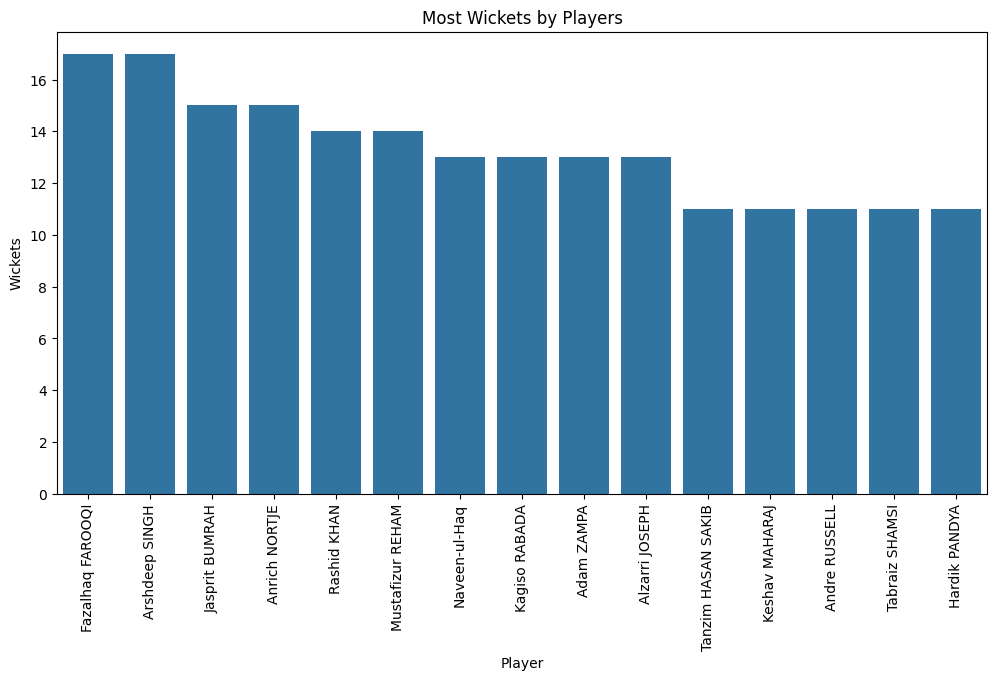

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Player', y='Wickets', data=bowling_stats)
plt.title('Most Wickets by Players')
plt.xticks(rotation=90)
plt.show()


In [10]:
print(bowling_stats.head())
print(team_stats.head())
print(batting_stats.head())

   Position          Team            Player Matches  Overs  Strike Rate  \
0         1   AFGHANISTAN  Fazalhaq FAROOQI       8   25.2         8.94   
1         2         INDIA    Arshdeep SINGH       8   30.0        10.58   
2         3         INDIA    Jasprit BUMRAH       8   29.4        11.86   
3         4  SOUTH AFRICA     Anrich NORTJE       9   35.0        14.00   
4         5   AFGHANISTAN       Rashid KHAN       8   29.0        12.42   

   Wickets  
0       17  
1       17  
2       15  
3       15  
4       14  
   Position          Team   Win %  Matches  Wins  Lost
0         1         INDIA  100.00        8     8     0
1         2  SOUTH AFRICA   88.89        9     8     1
2         3   WEST INDIES   71.43        7     5     2
3         3     AUSTRALIA   71.43        7     5     2
4         5   AFGHANISTAN   62.50        8     5     3
   Position          Team              Player  Matches  Innings  Bat Avg  Runs
0         1   AFGHANISTAN  Rahmanullah GURBAZ        8        

In [11]:
# Check for non-numeric values in 'Matches', 'Overs', 'Strike Rate' columns
print(bowling_stats[~bowling_stats['Matches'].apply(lambda x: str(x).isdigit())])
print(bowling_stats[~bowling_stats['Overs'].apply(lambda x: str(x).replace('.', '').isdigit())])
print(bowling_stats[~bowling_stats['Strike Rate'].apply(lambda x: str(x).replace('.', '').isdigit())])

    Position   Team         Player Matches  Overs  Strike Rate  Wickets
14        15  INDIA  Hardik PANDYA       B   25.0        13.63       11
Empty DataFrame
Columns: [Position, Team, Player, Matches, Overs, Strike Rate, Wickets]
Index: []
Empty DataFrame
Columns: [Position, Team, Player, Matches, Overs, Strike Rate, Wickets]
Index: []


In [12]:
# Convert columns to numeric, forcing non-numeric values to NaN
bowling_stats['Matches'] = pd.to_numeric(bowling_stats['Matches'], errors='coerce')
bowling_stats['Overs'] = pd.to_numeric(bowling_stats['Overs'], errors='coerce')
bowling_stats['Strike Rate'] = pd.to_numeric(bowling_stats['Strike Rate'], errors='coerce')
bowling_stats['Wickets'] = pd.to_numeric(bowling_stats['Wickets'], errors='coerce')

In [13]:
# Drop rows with NaN values
bowling_stats.dropna(inplace=True)

In [14]:
# Repeat for batting_stats
print(batting_stats[~batting_stats['Matches'].apply(lambda x: str(x).isdigit())])
print(batting_stats[~batting_stats['Innings'].apply(lambda x: str(x).isdigit())])
print(batting_stats[~batting_stats['Bat Avg'].apply(lambda x: str(x).replace('.', '').isdigit())])
print(batting_stats[~batting_stats['Runs'].apply(lambda x: str(x).isdigit())])

batting_stats['Matches'] = pd.to_numeric(batting_stats['Matches'], errors='coerce')
batting_stats['Innings'] = pd.to_numeric(batting_stats['Innings'], errors='coerce')
batting_stats['Bat Avg'] = pd.to_numeric(batting_stats['Bat Avg'], errors='coerce')
batting_stats['Runs'] = pd.to_numeric(batting_stats['Runs'], errors='coerce')

batting_stats.dropna(inplace=True)

Empty DataFrame
Columns: [Position, Team, Player, Matches, Innings, Bat Avg, Runs]
Index: []
Empty DataFrame
Columns: [Position, Team, Player, Matches, Innings, Bat Avg, Runs]
Index: []
Empty DataFrame
Columns: [Position, Team, Player, Matches, Innings, Bat Avg, Runs]
Index: []
Empty DataFrame
Columns: [Position, Team, Player, Matches, Innings, Bat Avg, Runs]
Index: []


In [15]:
# Descriptive statistics for bowling stats
print("Bowling Stats Descriptive Statistics:\n", bowling_stats.describe())
# Descriptive statistics for team stats
print("Team Stats Descriptive Statistics:\n", team_stats.describe())
# Descriptive statistics for batting stats
print("Batting Stats Descriptive Statistics:\n", batting_stats.describe())

Bowling Stats Descriptive Statistics:
        Position    Matches     Overs  Strike Rate    Wickets
count   14.0000  14.000000  14.00000    14.000000  14.000000
mean     7.5000   7.571429  26.35000    12.035000  13.428571
std      4.1833   1.016350   4.78455     1.830459   2.064882
min      1.0000   5.000000  16.50000     8.940000  11.000000
25%      4.2500   7.000000  24.07500    11.075000  11.500000
50%      7.5000   8.000000  27.20000    12.080000  13.000000
75%     10.7500   8.000000  29.30000    13.047500  14.750000
max     14.0000   9.000000  35.00000    15.270000  17.000000
Team Stats Descriptive Statistics:
         Position       Win %    Matches       Wins       Lost
count  15.000000   15.000000  15.000000  15.000000  15.000000
mean    7.866667   52.473333   5.733333   3.333333   2.266667
std     4.533473   22.567451   2.086236   2.410295   1.099784
min     1.000000   25.000000   3.000000   1.000000   0.000000
25%     4.000000   33.330000   4.000000   1.500000   2.000000
50% 

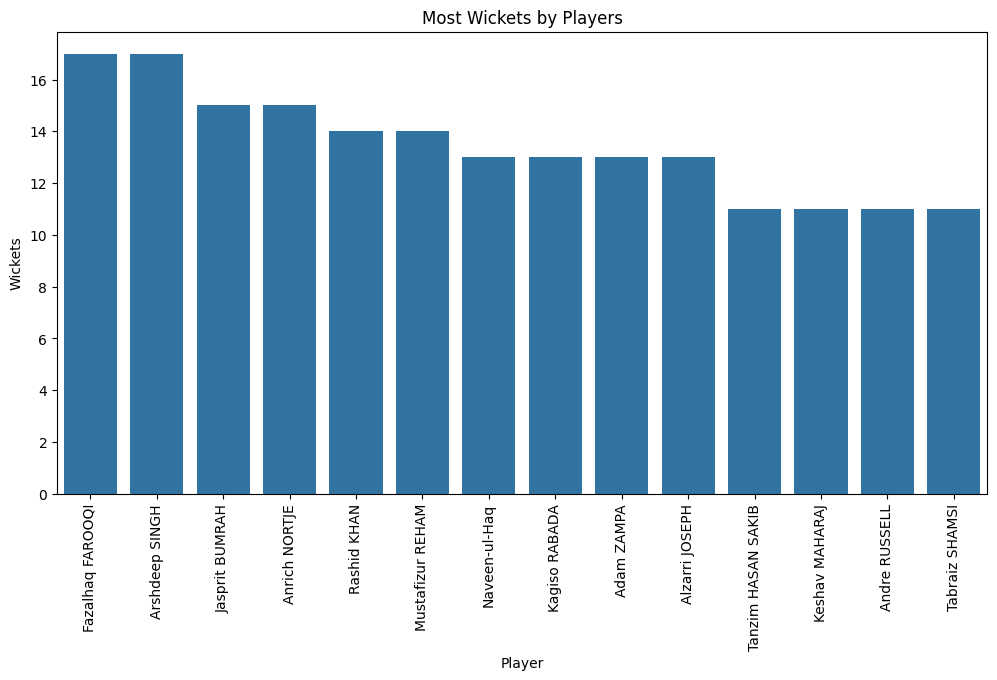

In [16]:
# Bar plot for most wickets
plt.figure(figsize=(12, 6))
sns.barplot(x='Player', y='Wickets', data=bowling_stats)
plt.title('Most Wickets by Players')
plt.xticks(rotation=90)
plt.show()

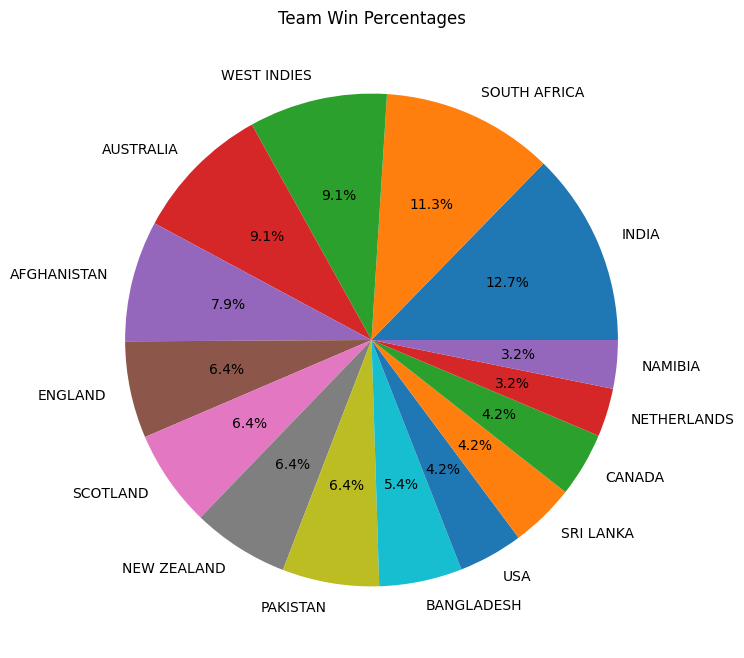

In [17]:
# Pie chart for team win percentages
plt.figure(figsize=(8, 8))
plt.pie(team_stats['Win %'], labels=team_stats['Team'], autopct='%1.1f%%')
plt.title('Team Win Percentages')
plt.show()

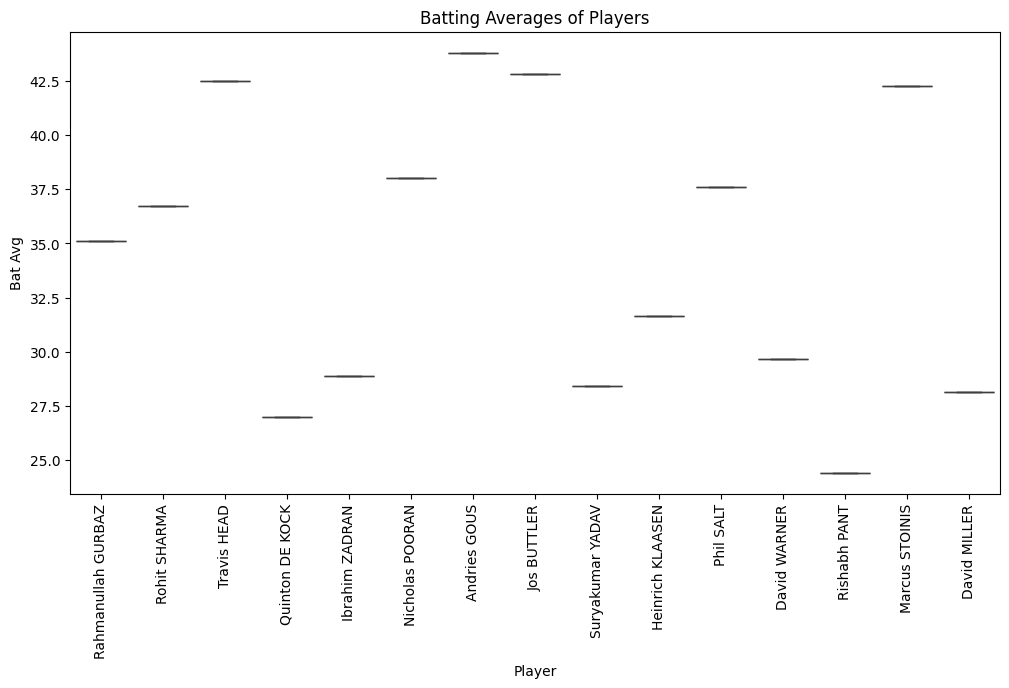

In [18]:

# Box plot for batting averages
plt.figure(figsize=(12, 6))
sns.boxplot(x='Player', y='Bat Avg', data=batting_stats)
plt.title('Batting Averages of Players')
plt.xticks(rotation=90)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare the data
X = bowling_stats[['Matches', 'Overs', 'Strike Rate']].values
y = bowling_stats['Wickets'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Compare predictions with actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



   Actual  Predicted
0      13  13.159415
1      11  10.443682
2      17  16.703932
Mean Absolute Error: 0.337266979248934
Mean Squared Error: 0.14085304893357892
R-squared: 0.9773629028499605


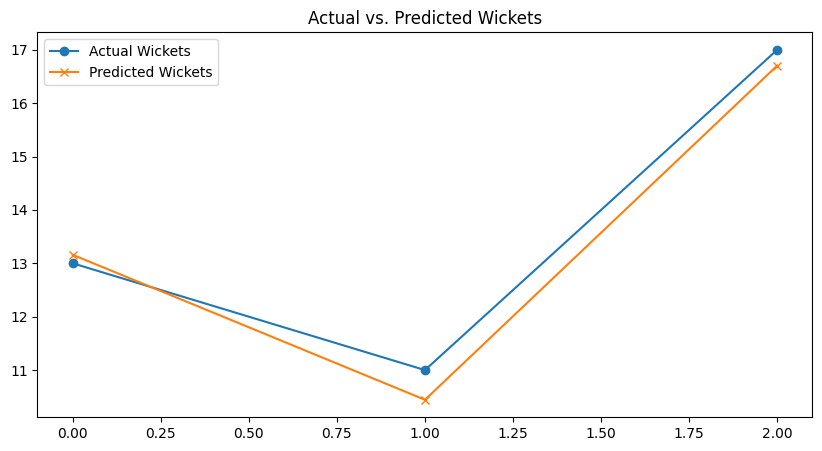

In [21]:
# Visualize Predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Wickets', marker='o')
plt.plot(y_pred, label='Predicted Wickets', marker='x')
plt.legend()
plt.title('Actual vs. Predicted Wickets')
plt.show()
